# Coursera Capstone project

This notebook is created to analyse the problem in the Coursera Capstone project and build a solution

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction/Business Problem

The aim of this project is to show that road accident data can be used in tackling road safety in the future. The history of road accidents are classed by Severity index. In the future, successful tackling of safety should result in a measurable decrease of severity index across road incidents. 

Safety should be of utmost concern for any governing body. The guarantee of safe movement of population increases the confidence of the general public, their capability in work and decreases individual and collective stress, not to mention the pride in a safe locality. These leads to a rise in general productivity of a region. Due to these factors, a study of road safety will be of interest not only to road transport and maintenance authorities, but also to state administrations and economic players.

The principle followed in this project will be to analyze the available data of road incidents with their severity codes and study the relation with factors like road and environment conditions, the person and vehicle conditions and similar other factors. Using this proper study, we can build a model which can predict the severity of a road incident using the prevailing conditions.

With the results of this project, we can expect to gain a valuable insight into what a severe road accident depends on, and work towards mitigating those concerns. This will result in bringing a new, safer environment for general public travel.

In [3]:
df_collisions = pd.read_csv(r"https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df_collisions.head()

C:\Users\anil_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


From the sample of the data, a preliminary list of the affecting factors can be identified:
- Location type
- Number of vehicles involved
- Time of incident
- Juntion category
- Under the influence
- Weather conditions
- Road conditions
- Light conditions
- Driver error

Lets do a preliminary analysis of each of these factors.

In [4]:
df_loc = df_collisions[["SEVERITYCODE","ADDRTYPE"]]
df_loc.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
3,1,Block
4,2,Intersection


In [5]:
# matplotlib inline
import matplotlib.pyplot as plt

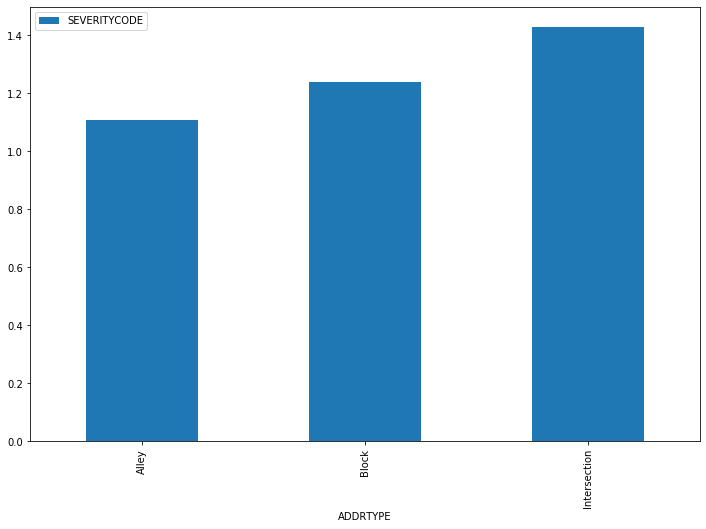

In [6]:
df_loc_mean = df_loc.groupby("ADDRTYPE").mean()
df_loc_mean.plot(kind="bar",figsize=(12,8))

The plot indicates that on average, a collision in an intersection tends to be more severe than in an alley or a block, but the difference is not very significant. So this factor will have a lesser weight.

In [7]:
df_no_veh = df_collisions[["SEVERITYCODE","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT"]]
df_no_veh["VEH_PED"] = df_no_veh["VEHCOUNT"]+df_no_veh["PEDCOUNT"]
df_no_veh["VEH_CYL"] = df_no_veh["VEHCOUNT"]+df_no_veh["PEDCYLCOUNT"]
df_no_veh.head()

C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,VEH_PED,VEH_CYL
0,2,0,0,2,2,2
1,1,0,0,2,2,2
2,1,0,0,3,3,3
3,1,0,0,3,3,3
4,2,0,0,2,2,2


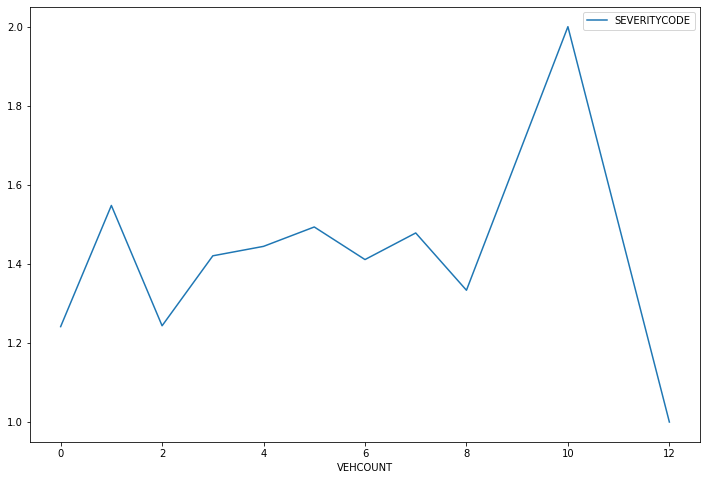

In [8]:
df_no_veh[["SEVERITYCODE","VEHCOUNT"]].groupby("VEHCOUNT").mean().plot(kind="line",figsize=(12,8))

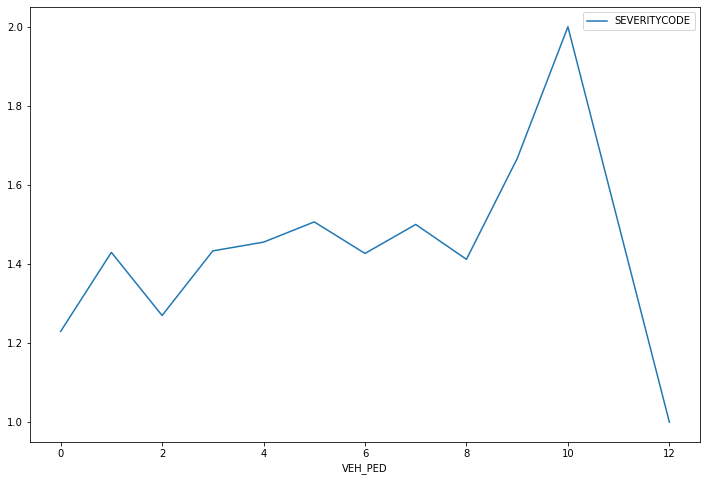

In [9]:
df_no_veh[["SEVERITYCODE","VEH_PED"]].groupby("VEH_PED").mean().plot(kind="line",figsize=(12,8))

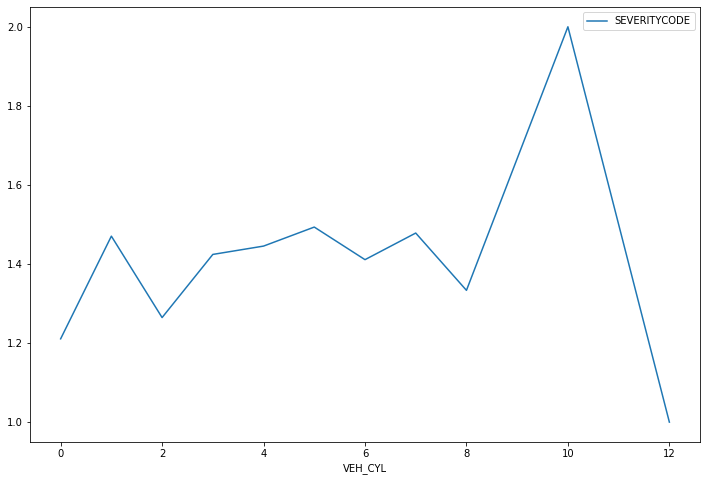

In [10]:
df_no_veh[["SEVERITYCODE","VEH_CYL"]].groupby("VEH_CYL").mean().plot(kind="line",figsize=(12,8))

I have created 3 plots to identify the relation between number of vehicles and the severity index.

1. Only cases with vehicles
2. Cases with vehicles and pedestrians
3. Cases with vehicles and cycles

The 3 graphs are almost equal, which shows that there is not really any effect with the presence of cyclists or pedestrians.
All the graphs display a variation in accident severity index with only the number of vehicles. But there is no measurable relationship in these graphs which can be used in severity index prediction.

In [11]:
import datetime as dt

df_time = df_collisions[["SEVERITYCODE","INCDTTM"]]
df_time["INCDTTM"] = pd.to_datetime(df_time["INCDTTM"])
df_time["INCHR"] = df_time["INCDTTM"].dt.hour
df_time.head()

C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SEVERITYCODE,INCDTTM,INCHR
0,2,2013-03-27 14:54:00,14
1,1,2006-12-20 18:55:00,18
2,1,2004-11-18 10:20:00,10
3,1,2013-03-29 09:26:00,9
4,2,2004-01-28 08:04:00,8


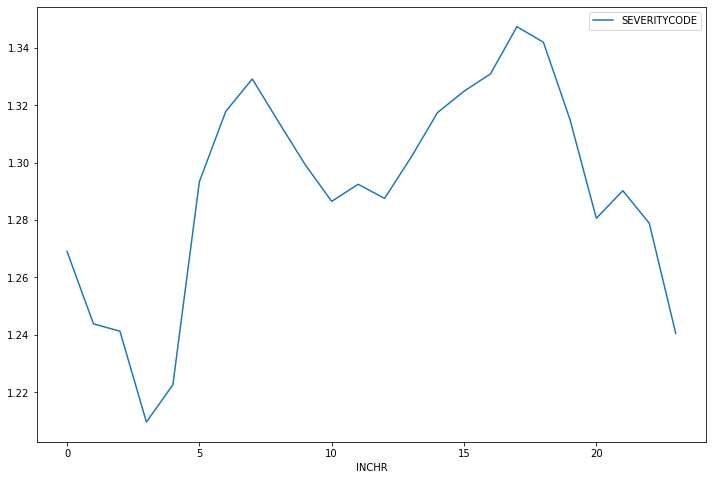

In [12]:
df_time_blocks = df_time[["INCHR","SEVERITYCODE"]].groupby("INCHR").mean().sort_values("INCHR")

df_time_blocks.plot(kind="line",figsize=(12,8))

The above plot shows how the average road accident severity index varies with the time of day.

We have peak values in the time ranges 6-9 am and 2-7 pm. As these are peak hours, road accident severity can be related to more traffic.
The medium level values are in the time ranges 10am-12pm & 8-10 pm.
The lowest values are observed in the time range 2-5 am, which reinforces the idea.

In [13]:
df_junc = df_collisions[["SEVERITYCODE","JUNCTIONTYPE"]]
df_junc = df_junc.groupby("JUNCTIONTYPE").mean()
df_junc.head()

,SEVERITYCODE
JUNCTIONTYPE,
At Intersection (but not related to intersection),1.296949
At Intersection (intersection related),1.432638
Driveway Junction,1.303064
Mid-Block (but intersection related),1.320184
Mid-Block (not related to intersection),1.216080


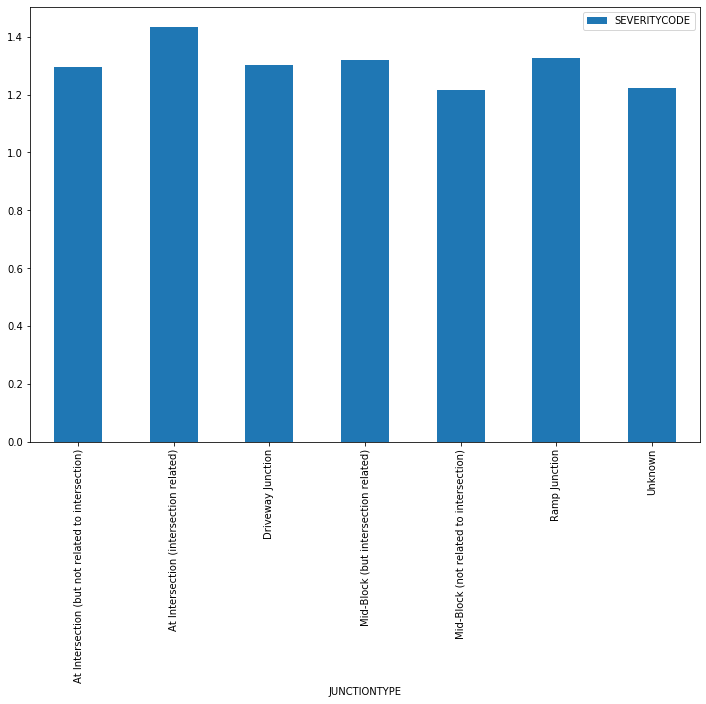

In [14]:
df_junc.plot(kind="bar",figsize=(12,8))

From the bar plot, it is clear that the intersection related incidents have the highest severity index on average.
But there is not a very big difference in the values compared to the other locations. So I will consider this factor after studying the more significant ones.

In [15]:
df_UI = df_collisions[["SEVERITYCODE","UNDERINFL"]]
df_UI.loc[df_UI["UNDERINFL"]=="0","UNDERINFL"] = "N"
df_UI.loc[df_UI["UNDERINFL"]=="1","UNDERINFL"] = "Y"
df_UI = df_UI.groupby("UNDERINFL").mean()
df_UI.head()

C:\Users\anil_\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SEVERITYCODE
UNDERINFL,
N,1.296660
Y,1.390527


In the original data, the attribute for Under the Influence had 4 values. The values should denote whether a driver was under the influence or not. So data preparation has been done to merge the values so as to have an easier understanding.

From the data, its already clear that driving under the influence creates a significant increase in the severity index in case of an accident.

In [16]:
df_weather = df_collisions[["SEVERITYCODE","WEATHER"]]
df_weather = df_weather.groupby("WEATHER").mean()
df_weather.head()

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,1.267857
Clear,1.322491
Fog/Smog/Smoke,1.328647
Other,1.139423
Overcast,1.315544


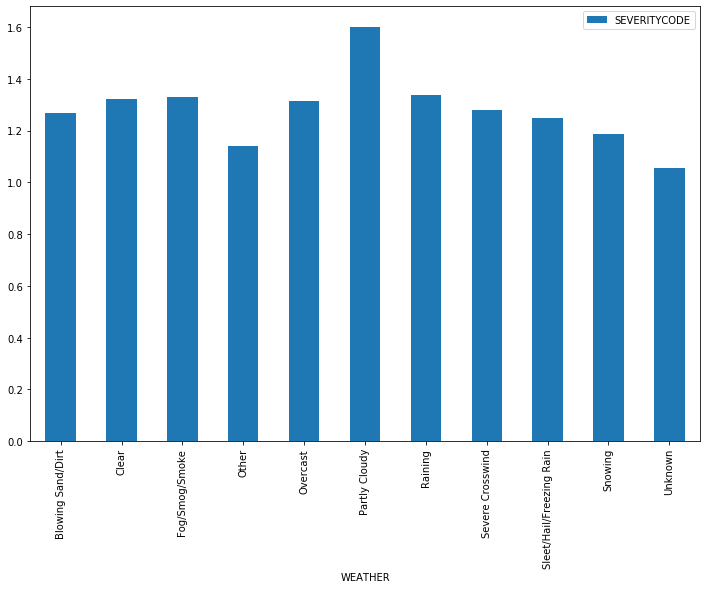

In [17]:
df_weather.plot(kind="bar",figsize=(12,8))

The plot relating Road accident severity with weather conditions throws up some interesting outcomes.

The highest values of average severity index is observed for cloudy conditions, and the next set of high values are for rain, fog, smoke and also surprisingly clear weather conditions. The lowest values of severity index for the known weather conditions are for snow and hail conditions.

The inference we can take from this pattern is that driver caution is a big factor in preventing road accidents. Slightly bad weather conditions like clouds, fog or light rain does not make the average driver more cautious and thus leads to carelessness. This is why the number is high for clear conditions as well. Whereas very bad conditions like snow or hail detriments heavily the driving conditions which leads to higher driver caution and lower speeds and thus is reflected in the severity index. 

This result shows us the growing need for improving driver education and driver awareness in road safety measures.

In [18]:
df_road = df_collisions[["SEVERITYCODE","ROADCOND"]]
df_road = df_road.groupby("ROADCOND").mean()
df_road.head()

,SEVERITYCODE
ROADCOND,
Dry,1.321773
Ice,1.225806
Oil,1.375000
Other,1.325758
Sand/Mud/Dirt,1.306667


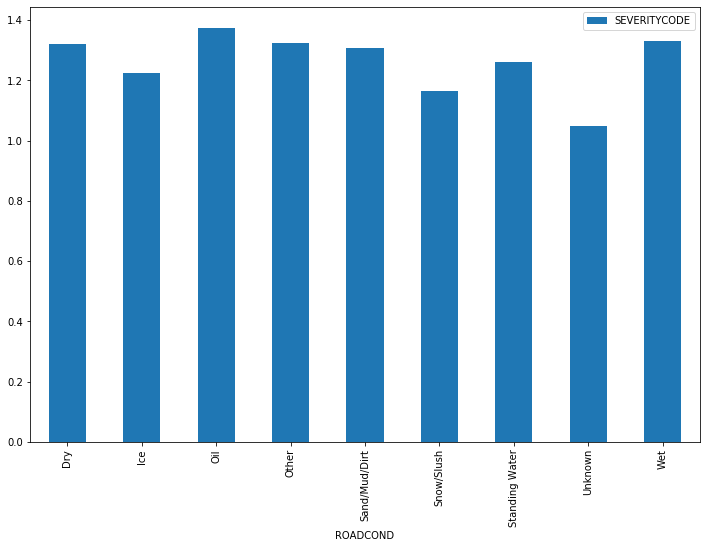

In [19]:
df_road.plot(kind="bar",figsize=(12,8))

The plot of accident severity with road conditions also gives a similar result to that of weather conditions.

Highest severity index is associated with oily road condition, followed by wet, standing water and dry road conditions. The lowest values are observed for icy and snowy roads. Icy and snowy roads do not allow for higher speeds and reduces the risk of a road incident.

Driver alertness and caution is again proved to be a big factor in road accident severity.

In [20]:
df_light = df_collisions[["SEVERITYCODE","LIGHTCOND"]].groupby("LIGHTCOND").mean()
df_light.head()

,SEVERITYCODE
LIGHTCOND,
Dark - No Street Lights,1.217306
Dark - Street Lights Off,1.263553
Dark - Street Lights On,1.298411
Dark - Unknown Lighting,1.363636
Dawn,1.329337


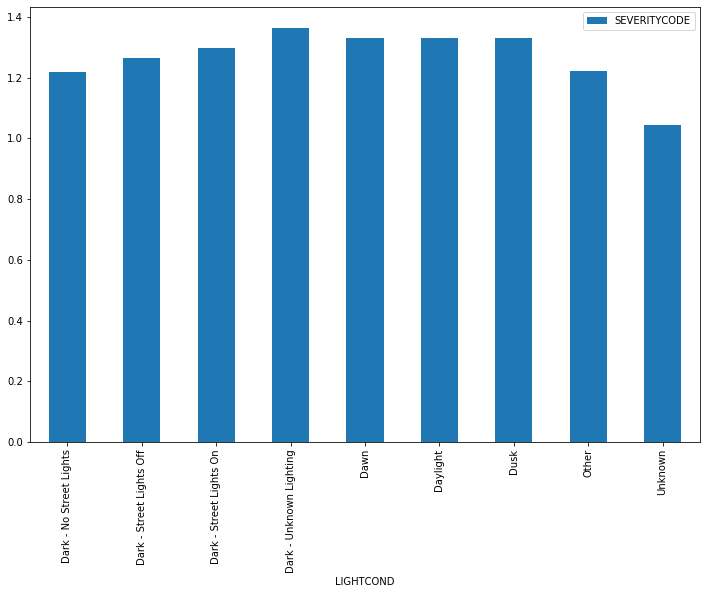

In [21]:
df_light.plot(kind="bar",figsize=(12,8))

Next I have checked the factor of road lighting, which also reveals some interesting outcomes.

Higher average values of Accident severity index correspond to unknown lighting conditions at night, and at dawn, dusk and daylight conditions. Of these conditions, excluding daylight, all the other conditions can cause an illusionary effect to drivers, especially with unfamiliar lighting. This can explain higher accident severity. High values in daylight would be attributed to peak hours and speeding issues.

Severity index is low in normal or no lighting conditions at night. Driver training, experience and familiarity in the case of lighting greatly improves road safety.

In [36]:
df_driver = df_collisions[["SEVERITYCODE","INATTENTIONIND","PEDROWNOTGRNT","SPEEDING","HITPARKEDCAR"]]
df_driver.fillna('N',inplace=True)
df_driver.head()

C:\Users\anil_\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,SEVERITYCODE,INATTENTIONIND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,N,N,N,N
1,1,N,N,N,N
2,1,N,N,N,N
3,1,N,N,N,N
4,2,N,N,N,N


In [37]:
df_driver[["SEVERITYCODE","HITPARKEDCAR"]].groupby("HITPARKEDCAR").mean()

,SEVERITYCODE
HITPARKEDCAR,
N,1.308017
Y,1.062084


In [38]:
df_driver[["SEVERITYCODE","INATTENTIONIND"]].groupby("INATTENTIONIND").mean()

,SEVERITYCODE
INATTENTIONIND,
N,1.289874
Y,1.348834


In [39]:
df_driver[["SEVERITYCODE","PEDROWNOTGRNT"]].groupby("PEDROWNOTGRNT").mean()

,SEVERITYCODE
PEDROWNOTGRNT,
N,1.284102
Y,1.901436


In [40]:
df_driver[["SEVERITYCODE","SPEEDING"]].groupby("SPEEDING").mean()

,SEVERITYCODE
SPEEDING,
N,1.294901
Y,1.378335


From the above data, it is clear that accidents due to inattention, speeding and not granting priority to pedestrians have a higher severity value. In particular, accidents of not granting priority to pedestrians have a significant jump in the severity index. It is also interesting that this observation was not seen in the earlier plot of accidents involving pedestrians. Hitting a parked car actually results in a lesser severity code, so I will not give it much importance in the rest of the study.